In [2]:
import duckdb
import pandas as pd


In [3]:
duckdb.sql('CREATE TABLE airports AS SELECT * from "airports.csv"')

In [4]:
duckdb.sql('select * from airports')

┌────────────┬─────────────────────┬─────────┬─────────────────────────────────────┐
│ airport_id │        city         │  state  │                name                 │
│   int64    │       varchar       │ varchar │               varchar               │
├────────────┼─────────────────────┼─────────┼─────────────────────────────────────┤
│      10165 │ Adak Island         │ AK      │ Adak                                │
│      10299 │ Anchorage           │ AK      │ Ted Stevens Anchorage International │
│      10304 │ Aniak               │ AK      │ Aniak Airport                       │
│      10754 │ Barrow              │ AK      │ Wiley Post/Will Rogers Memorial     │
│      10551 │ Bethel              │ AK      │ Bethel Airport                      │
│      10926 │ Cordova             │ AK      │ Merle K Mudhole Smith               │
│      14709 │ Deadhorse           │ AK      │ Deadhorse Airport                   │
│      11336 │ Dillingham          │ AK      │ Dillingham Airport

In [5]:
duckdb.sql('CREATE TABLE airlines AS select * from "airlines.csv"')

In [6]:
duckdb.sql('select * from airlines')

┌─────────┬──────────────────────────────────────────────┐
│ column0 │                   column1                    │
│ varchar │                   varchar                    │
├─────────┼──────────────────────────────────────────────┤
│ Code    │ Description                                  │
│ 02Q     │ Titan Airways                                │
│ 04Q     │ Tradewind Aviation                           │
│ 05Q     │ Comlux Aviation, AG                          │
│ 06Q     │ Master Top Linhas Aereas Ltd.                │
│ 07Q     │ Flair Airlines Ltd.                          │
│ 09Q     │ Swift Air, LLC                               │
│ 0BQ     │ DCA                                          │
│ 0CQ     │ ACM AIR CHARTER GmbH                         │
│ 0GQ     │ Inter Island Airways, d/b/a Inter Island Air │
│ ·       │          ·                                   │
│ ·       │          ·                                   │
│ ·       │          ·                                  

In [7]:
duckdb.sql('CREATE TABLE flights AS SELECT * FROM "flights.csv"')

In [8]:
duckdb.sql('SELECT * FROM flights')

┌────────────┬───────────┬─────────┬─────────────────┬───────────────┬──────────┬──────────┐
│ DayofMonth │ DayOfWeek │ Carrier │ OriginAirportID │ DestAirportID │ DepDelay │ ArrDelay │
│   int64    │   int64   │ varchar │      int64      │     int64     │  int64   │  int64   │
├────────────┼───────────┼─────────┼─────────────────┼───────────────┼──────────┼──────────┤
│         19 │         5 │ DL      │           11433 │         13303 │       -3 │        1 │
│         19 │         5 │ DL      │           14869 │         12478 │        0 │       -8 │
│         19 │         5 │ DL      │           14057 │         14869 │       -4 │      -15 │
│         19 │         5 │ DL      │           15016 │         11433 │       28 │       24 │
│         19 │         5 │ DL      │           11193 │         12892 │       -6 │      -11 │
│         19 │         5 │ DL      │           10397 │         15016 │       -1 │      -19 │
│         19 │         5 │ DL      │           15016 │         10397 │

In [9]:
duckdb.sql("""ALTER TABLE airlines
RENAME COLUMN column0 TO Carrier""")
duckdb.sql("""ALTER TABLE airlines
RENAME COLUMN column1 TO CarrierName""")

In [10]:
duckdb.sql("select * from airlines ")

┌─────────┬──────────────────────────────────────────────┐
│ Carrier │                 CarrierName                  │
│ varchar │                   varchar                    │
├─────────┼──────────────────────────────────────────────┤
│ Code    │ Description                                  │
│ 02Q     │ Titan Airways                                │
│ 04Q     │ Tradewind Aviation                           │
│ 05Q     │ Comlux Aviation, AG                          │
│ 06Q     │ Master Top Linhas Aereas Ltd.                │
│ 07Q     │ Flair Airlines Ltd.                          │
│ 09Q     │ Swift Air, LLC                               │
│ 0BQ     │ DCA                                          │
│ 0CQ     │ ACM AIR CHARTER GmbH                         │
│ 0GQ     │ Inter Island Airways, d/b/a Inter Island Air │
│ ·       │          ·                                   │
│ ·       │          ·                                   │
│ ·       │          ·                                  

In [11]:
duckdb.sql('show all tables')

┌──────────┬─────────┬──────────┬──────────────────────┬───────────────────────────────────────────────────┬───────────┐
│ database │ schema  │   name   │     column_names     │                   column_types                    │ temporary │
│ varchar  │ varchar │ varchar  │      varchar[]       │                     varchar[]                     │  boolean  │
├──────────┼─────────┼──────────┼──────────────────────┼───────────────────────────────────────────────────┼───────────┤
│ memory   │ main    │ airlines │ [Carrier, CarrierN…  │ [VARCHAR, VARCHAR]                                │ false     │
│ memory   │ main    │ airports │ [airport_id, city,…  │ [BIGINT, VARCHAR, VARCHAR, VARCHAR]               │ false     │
│ memory   │ main    │ flights  │ [DayofMonth, DayOf…  │ [BIGINT, BIGINT, VARCHAR, BIGINT, BIGINT, BIGIN…  │ false     │
└──────────┴─────────┴──────────┴──────────────────────┴───────────────────────────────────────────────────┴───────────┘

In [12]:
duckdb.sql(""" select a1.city FROM_CITY, a2.city TO_CITY, f. * from flights f
                join airports a1
                join airports a2
                on f.OriginAirportID = a1.airport_id
                on f.DestAirportID = a2.airport_id
                """)

┌───────────────────┬────────────────┬────────────┬───┬─────────────────┬───────────────┬──────────┬──────────┐
│     FROM_CITY     │    TO_CITY     │ DayofMonth │ … │ OriginAirportID │ DestAirportID │ DepDelay │ ArrDelay │
│      varchar      │    varchar     │   int64    │   │      int64      │     int64     │  int64   │  int64   │
├───────────────────┼────────────────┼────────────┼───┼─────────────────┼───────────────┼──────────┼──────────┤
│ Detroit           │ Miami          │         19 │ … │           11433 │         13303 │       -3 │        1 │
│ Salt Lake City    │ New York       │         19 │ … │           14869 │         12478 │        0 │       -8 │
│ Portland          │ Salt Lake City │         19 │ … │           14057 │         14869 │       -4 │      -15 │
│ St. Louis         │ Detroit        │         19 │ … │           15016 │         11433 │       28 │       24 │
│ Atlanta           │ St. Louis      │         19 │ … │           10397 │         15016 │       -1 │    

In [28]:
duckdb.sql("""select a1.city DEPARTURE, a2.city ARRIVAL, f.Carrier, al.CarrierName, f.DepDelay, f.ArrDelay From flights f

           
JOIN airports a1
on f.OriginAirportID = a1.airport_ID
           
JOIN airports a2
ON f.DestAirportID  = a2.airport_id
           
JOIN airlines al
ON f.Carrier = al.Carrier
           
ORDER BY DepDelay 
""")

┌────────────────┬──────────────┬─────────┬─────────────────────────────┬──────────┬──────────┐
│   DEPARTURE    │   ARRIVAL    │ Carrier │         CarrierName         │ DepDelay │ ArrDelay │
│    varchar     │   varchar    │ varchar │           varchar           │  int64   │  int64   │
├────────────────┼──────────────┼─────────┼─────────────────────────────┼──────────┼──────────┤
│ Baltimore      │ Philadelphia │ F9      │ Frontier Airlines Inc.      │      -63 │      -23 │
│ Raleigh/Durham │ New York     │ MQ      │ Envoy Air                   │      -60 │      -69 │
│ Denver         │ Nashville    │ EV      │ ExpressJet Airlines Inc.    │      -52 │      -10 │
│ Fort Myers     │ Pittsburgh   │ FL      │ AirTran Airways Corporation │      -49 │      -53 │
│ Los Angeles    │ Phoenix      │ OO      │ SkyWest Airlines Inc.       │      -45 │      -10 │
│ Milwaukee      │ Houston      │ EV      │ ExpressJet Airlines Inc.    │      -42 │      -19 │
│ Baltimore      │ Philadelphia │ F9    

In [14]:
duckdb.sql("""create table flight_delay as
           select a1.city DEPARTURE, a2.city ARRIVAL, f.Carrier, al.CarrierName, f.DepDelay, f.ArrDelay From flights f
           JOIN airports a1
           on f.OriginAirportID = a1.airport_ID    
           JOIN airports a2
           ON f.DestAirportID  = a2.airport_id     
           JOIN airlines al
           ON f.Carrier = al.Carrier
""")



In [15]:
duckdb.sql('show all tables')

┌──────────┬─────────┬──────────────┬──────────────────────┬───────────────────────────────────────────────┬───────────┐
│ database │ schema  │     name     │     column_names     │                 column_types                  │ temporary │
│ varchar  │ varchar │   varchar    │      varchar[]       │                   varchar[]                   │  boolean  │
├──────────┼─────────┼──────────────┼──────────────────────┼───────────────────────────────────────────────┼───────────┤
│ memory   │ main    │ airlines     │ [Carrier, CarrierN…  │ [VARCHAR, VARCHAR]                            │ false     │
│ memory   │ main    │ airports     │ [airport_id, city,…  │ [BIGINT, VARCHAR, VARCHAR, VARCHAR]           │ false     │
│ memory   │ main    │ flight_delay │ [DEPARTURE, ARRIVA…  │ [VARCHAR, VARCHAR, VARCHAR, VARCHAR, BIGINT…  │ false     │
│ memory   │ main    │ flights      │ [DayofMonth, DayOf…  │ [BIGINT, BIGINT, VARCHAR, BIGINT, BIGINT, B…  │ false     │
└──────────┴─────────┴──────────

In [16]:
duckdb.sql('select *from flight_delay')

┌───────────┬────────────────┬─────────┬────────────────────────┬──────────┬──────────┐
│ DEPARTURE │    ARRIVAL     │ Carrier │      CarrierName       │ DepDelay │ ArrDelay │
│  varchar  │    varchar     │ varchar │        varchar         │  int64   │  int64   │
├───────────┼────────────────┼─────────┼────────────────────────┼──────────┼──────────┤
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │       -8 │       -9 │
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │       -3 │       -3 │
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │       -4 │       -6 │
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │       -6 │       -7 │
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │        2 │        3 │
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │       -9 │      -10 │
│ Honolulu  │ Kahului        │ HA      │ Hawaiian Airlines Inc. │       -2 │       -1 │
│ Honolulu  │ Kahului        │ H

In [17]:
duckdb.sql("""SELECT CarrierName, count(*) total_count 
FROM flight_delay 
GROUP BY CarrierName 
ORDER BY total_count DESC""")

┌─────────────────────────────┬─────────────┐
│         CarrierName         │ total_count │
│           varchar           │    int64    │
├─────────────────────────────┼─────────────┤
│ Southwest Airlines Co.      │      575739 │
│ Delta Air Lines Inc.        │      381657 │
│ American Airlines Inc.      │      289855 │
│ United Air Lines Inc.       │      286418 │
│ US Airways Inc.             │      233321 │
│ SkyWest Airlines Inc.       │      160164 │
│ ExpressJet Airlines Inc.    │      157928 │
│ JetBlue Airways             │      121906 │
│ Envoy Air                   │      113212 │
│ AirTran Airways Corporation │       92702 │
│ Endeavor Air Inc.           │       80031 │
│ Alaska Airlines Inc.        │       68555 │
│ Mesa Airlines Inc.          │       52821 │
│ Frontier Airlines Inc.      │       35738 │
│ Virgin America              │       34739 │
│ Hawaiian Airlines Inc.      │       17432 │
├─────────────────────────────┴─────────────┤
│ 16 rows                         

In [18]:
duckdb.sql("""SELECT CarrierName, count(*) total_count 
        FROM flight_delay
        WHERE DepDelay  > 0 
        GROUP BY CarrierName 
        ORDER BY total_count DESC""")

┌─────────────────────────────┬─────────────┐
│         CarrierName         │ total_count │
│           varchar           │    int64    │
├─────────────────────────────┼─────────────┤
│ Southwest Airlines Co.      │      341822 │
│ United Air Lines Inc.       │      133146 │
│ American Airlines Inc.      │      126318 │
│ Delta Air Lines Inc.        │      119574 │
│ US Airways Inc.             │       68636 │
│ ExpressJet Airlines Inc.    │       59554 │
│ SkyWest Airlines Inc.       │       50467 │
│ JetBlue Airways             │       46491 │
│ Envoy Air                   │       45372 │
│ AirTran Airways Corporation │       41588 │
│ Endeavor Air Inc.           │       23391 │
│ Frontier Airlines Inc.      │       16858 │
│ Mesa Airlines Inc.          │       16584 │
│ Alaska Airlines Inc.        │       15372 │
│ Virgin America              │       14162 │
│ Hawaiian Airlines Inc.      │        4163 │
├─────────────────────────────┴─────────────┤
│ 16 rows                         

In [40]:
duckdb.sql("""SELECT CarrierName, AVG(ArrDelay) AS average_arrival_delay, AVG(DepDelay) AS average_dep_delay
                FROM flight_delay 
                WHERE ArrDelay  > 0 and DepDelay > 0
                GROUP BY CarrierName
                ORDER BY average_arrival_delay DESC""")

┌─────────────────────────────┬───────────────────────┬────────────────────┐
│         CarrierName         │ average_arrival_delay │ average_dep_delay  │
│           varchar           │        double         │       double       │
├─────────────────────────────┼───────────────────────┼────────────────────┤
│ Virgin America              │     55.03775469436676 │  55.01468238114263 │
│ ExpressJet Airlines Inc.    │     54.68760206004271 │  55.31394715906712 │
│ Envoy Air                   │     53.31577158395649 │  51.02313967473723 │
│ Endeavor Air Inc.           │    53.261712528148514 │ 54.051958038117206 │
│ JetBlue Airways             │     52.14493669147738 │  50.81287593726826 │
│ Mesa Airlines Inc.          │    48.194153138916825 │ 47.021117655509265 │
│ United Air Lines Inc.       │     44.68019790176442 │  46.09022412970911 │
│ American Airlines Inc.      │     44.01982418983854 │ 44.589020974243354 │
│ Delta Air Lines Inc.        │    43.464711429193166 │ 43.392236272637156 │

In [27]:
a = duckdb.sql("""SELECT CarrierName, AVG(ArrDelay) AS average_arrival_delay
                FROM flight_delay 
                WHERE ArrDelay  > 0
                GROUP BY CarrierName
                ORDER BY average_arrival_delay DESC""")
results= a.fetchall()
df = pd.DataFrame(results, columns=[col[0] for col in a.description])
print(df)

                    CarrierName  average_arrival_delay
0      ExpressJet Airlines Inc.              44.478942
1                Virgin America              42.267231
2                     Envoy Air              42.259557
3               JetBlue Airways              40.404175
4             Endeavor Air Inc.              40.061074
5         United Air Lines Inc.              37.764346
6        American Airlines Inc.              35.639232
7            Mesa Airlines Inc.              33.646634
8          Delta Air Lines Inc.              31.665422
9         SkyWest Airlines Inc.              30.275555
10       Frontier Airlines Inc.              30.138165
11  AirTran Airways Corporation              29.575597
12              US Airways Inc.              26.410171
13       Southwest Airlines Co.              25.985501
14       Hawaiian Airlines Inc.              18.166456
15         Alaska Airlines Inc.              18.089117


C:\Users\HOME\AppData\Local\Temp\ipykernel_11620\3133691807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CarrierName', y='average_arrival_delay', data=df, palette='viridis')


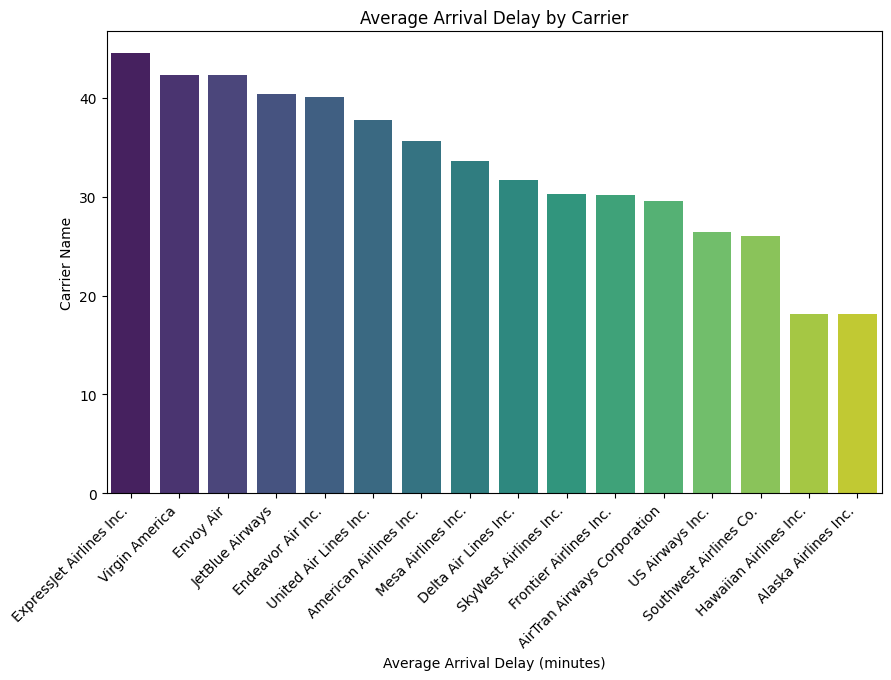

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))
sns.barplot(x='CarrierName', y='average_arrival_delay', data=df, palette='viridis')
plt.xticks(rotation=45, ha ='right')

# Set labels and title
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Carrier Name')
plt.title('Average Arrival Delay by Carrier')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Scatter Plot')

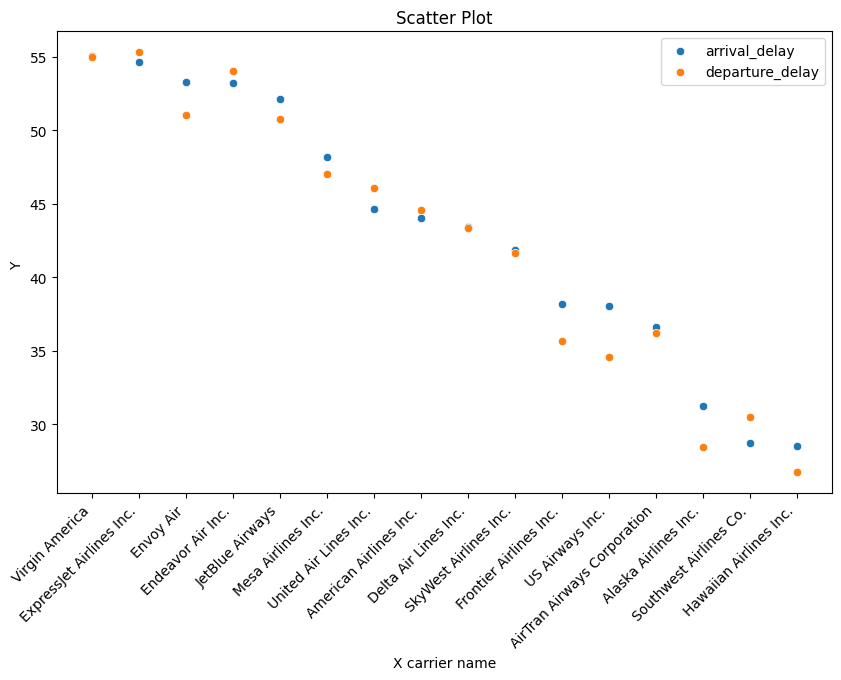

In [49]:
c = duckdb.sql("""SELECT CarrierName, AVG(ArrDelay) AS average_arrival_delay, AVG(DepDelay) AS average_dep_delay
                FROM flight_delay 
                WHERE ArrDelay  > 0 and DepDelay > 0
                GROUP BY CarrierName
                ORDER BY average_arrival_delay DESC""")

resultss= c.fetchall()

df1 = pd.DataFrame(resultss, columns=[col[0] for col in c.description])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='CarrierName', y='average_arrival_delay', data=df1, label= "arrival_delay" )
sns.scatterplot(x='CarrierName', y='average_dep_delay', data=df1, label= "departure_delay")
plt.xticks(rotation=45, ha ='right')
plt.xlabel('X carrier name')
plt.ylabel('Y ')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

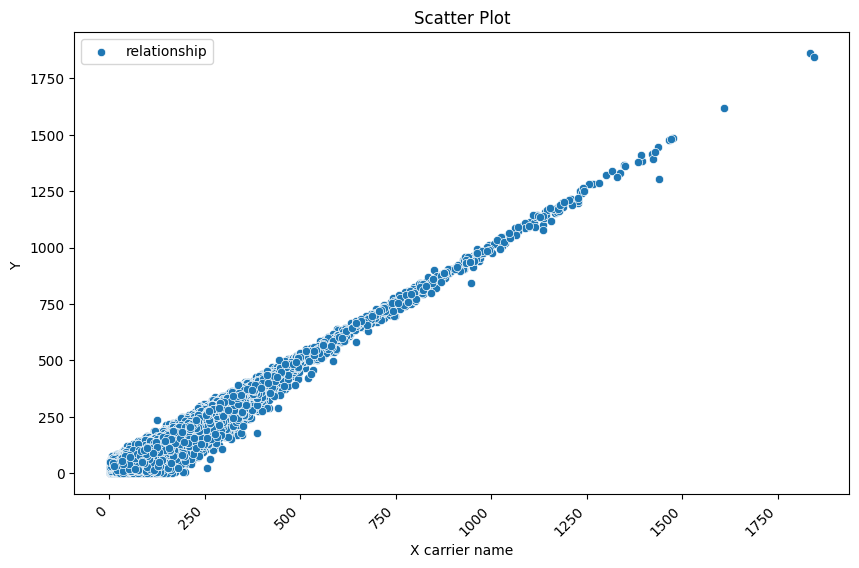

In [60]:
c = duckdb.sql("""SELECT CarrierName, ArrDelay, DepDelay 
                FROM flight_delay 
                WHERE ArrDelay  > 0 and DepDelay > 0
                GROUP BY CarrierName, ArrDelay, DepDelay
                """)

resultsss= c.fetchall()

df2 = pd.DataFrame(resultsss, columns=[col[0] for col in c.description])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='ArrDelay', y='DepDelay', data=df2, label= "relationship" )
plt.xticks(rotation=45, ha ='right')
plt.xlabel('X carrier name')
plt.ylabel('Y ')
plt.title('Scatter Plot')